# First Analysis

### Importing all needed packages

In [473]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
from tqdm import tqdm 

### Mechanism to hidden some words from analysis.

In [474]:
# SHOW_USELESS_WORDS = True
SHOW_USELESS_WORDS = False

In [475]:
uselessWords = {
    'o', 'a', 'os', 'as', 
    'um', 'uma', 'uns', 'umas', 
    'e',
    'de', 'do', 'da',
    'sobre',
    'ma',
    'lo', 'la'
    'que',
    'se',
    'em',
    'com',
    'é',
    'que'
}
# uselessWords

### Loading into a dataframe the content of the dataset (CSV file)

In [476]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [477]:
len(rawDf)

72777

### Some manipulation to the strings.

- lower case
- replace some symbols

In [478]:
df = rawDf['review_text'].str.lower()
df.head()

0    sabe todos aqueles livros que ensinam você a c...
1    ensinamentos que eu tive quando li o livro:1. ...
2    sucinto livro de parábolas, o homem mais rico ...
3    de forma clara traz ensinamentos sobre educaçã...
4    o livro o homem mais rico da babilônia está fa...
Name: review_text, dtype: object

In [479]:
df[1]

'ensinamentos que eu tive quando li o livro:1. primeiro pague a si mesmo e depois aos outros.“uma parte de todos os seus ganhos pertencem exclusivamente a você.”quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. no livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. as outras 9 moedas você pode gastar. mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. gastar com necessidades, e não com desejos.precisamos gastar menos do que ganhamos.2. controle os seus gastos. muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. por isso, precisamos saber exatamente no que gastamos. é necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. multiplique o seu dinheiro.depois que você consegui

In [480]:
def cleanWord( word ):
    
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace('❤', '')
    word = word.replace('💜', '')

    return word

### Creating a list with all unique words to use further.

In [ ]:
# For time counting
startTime = time.time()

allWords = list()
words = list()

for review in df:
    
#     print(review)
    rawWords = str(review).split()
    
    for word in rawWords:
        word = cleanWord( word )
        
        if word not in words:
            words.append( word )

if not SHOW_USELESS_WORDS:
    
    for word in words:
        if word in uselessWords:
            continue
        else:
            allWords.append( word )
        
else: 
    allWords = words
    
# allWords

# For time counting
endTime = time.time()
elapsedTime = endTime - startTime
print( f'Running Time: {elapsedTime / 60} minutes' )

### Total of unique words.

In [ ]:
print( 'List size: {}'.format( len(allWords) ) )

### Build a word cloud with all unique words.

In [ ]:
allJoinedWords = " ".join( allWords ) + " "

if SHOW_USELESS_WORDS:

    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        min_font_size = 10
    ).generate( allJoinedWords )
    
else:
    
    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        stopwords = uselessWords,
        min_font_size = 12
    ).generate( allJoinedWords )

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Seeing the words and each total in a table way.

In [ ]:
allWordsDict = {}
for review in df:
    
    # print(review)
    
    words = str(review).split()
    # print(words)
    
    for word in words:
        
        if (not SHOW_USELESS_WORDS) and (word in uselessWords):
            continue
        
        word = cleanWord( word )
        
        if word not in allWordsDict.keys():
            
            allWordsDict[word] = 1
            
        else:
            
            allWordsDict[word] += 1

# print( allWordsDict )

In [ ]:
allWordsDF = pd.DataFrame()

allWordsDF[ 'word' ] = allWordsDict.keys()
allWordsDF[ 'count' ] = allWordsDict.values()

allWordsDF.head(10)

In [ ]:
allWordsDF.sort_values(
    by = 'count',
    ascending = 0)

# Second Analysis

#### Using Spacy and K-Means to analyze the tokens and try to group the contained sentences in each review.

#### Good tutorials and other texts

- Tutorial: Text Classification in Python Using spaCy
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

## Importing all needed packages

#### Command to install **spaCy** package: ***pip install spacy***

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import spacy
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
import seaborn as sns

## Installing and loading the Portuguese pipeline.
#### To install Portuguese pipeline by command line, type: *python -m spacy download pt_core_news_lg*
#### See more on: https://spacy.io/models/pt#pt_core_news_lg


In [2]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [3]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [4]:
df = rawDf
df.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


## Some values in the *review_text* column are *nan* so I changed the values to an empty string to avoid breaking the program when reading each item to extract the sentences.

One example:

|book_id|review_id|review_rating|review_title|review_text|
|:------|:------:|:------:|:------|:------:|
|8547000240|R1QX38W7D6QOQ4|5<!-- .element: style="text-align:center;" -->|livro maravilhoso, ainda estou acabando de ler mais posso afirma que e espetacular.|nan|

In [5]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [6]:
df = rawDf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72777 entries, 0 to 72776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        72777 non-null  int64 
 1   review_id      72777 non-null  object
 2   review_rating  72777 non-null  object
 3   review_title   72700 non-null  object
 4   review_text    72774 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [7]:
df['review_text'] = df['review_text'].fillna('')

In [8]:
df['review_text'].isnull().values.any()

False

In [9]:
reviewPosition = 1

In [10]:
df.iloc[reviewPosition]

book_id                                                 8595081530
review_id                                           R3KC0ZLPQX85LT
review_rating                                                    5
review_title                                       Livro excelente
review_text      Ensinamentos que eu tive quando li o livro:1. ...
Name: 1, dtype: object

In [11]:
doc = nlp( u''.join(df.iloc[reviewPosition]['review_text']) )
doc

Ensinamentos que eu tive quando li o livro:1. Primeiro pague a si mesmo e depois aos outros.“Uma parte de todos os seus ganhos pertencem exclusivamente a você.”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. As outras 9 moedas você pode gastar. Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. Gastar com necessidades, e não com desejos.Precisamos gastar menos do que ganhamos.2. Controle os seus gastos. Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. Por isso, precisamos saber exatamente no que gastamos. É necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. Multiplique o seu dinheiro.Depois que você conseguir

In [12]:
totalTokensToPrint = 30

print( f'Printing the first {totalTokensToPrint}th tokens:\n' )

for token in doc[0:totalTokensToPrint]:
    print( f'{token.text:{15}} {spacy.explain(token.pos_):{30}} {token.lemma_:{15}}' )

Printing the first 30th tokens:

Ensinamentos    noun                           Ensinamentos   
que             pronoun                        que            
eu              pronoun                        eu             
tive            verb                           ter            
quando          adverb                         quando         
li              verb                           ler            
o               determiner                     o              
livro:1         proper noun                    livro:1        
.               punctuation                    .              
Primeiro        adverb                         Primeiro       
pague           verb                           pagar          
a               adposition                     o              
si              pronoun                        si             
mesmo           adverb                         mesmo          
e               coordinating conjunction       e              
depois          adverb

In [13]:
for sentence in doc.sents:
    
    print( f'{sentence}' )
    print( f'--- Sentence size: {len(sentence)}' )
    print()

Ensinamentos que eu tive quando li o livro:1.
--- Sentence size: 9

Primeiro pague a si mesmo e depois aos outros.
--- Sentence size: 10

“Uma parte de todos os seus ganhos pertencem exclusivamente a você.
--- Sentence size: 12

”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar.
--- Sentence size: 16

No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma.
--- Sentence size: 18

As outras 9 moedas você pode gastar.
--- Sentence size: 8

Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter.
--- Sentence size: 16

Gastar com necessidades, e não com desejos.
--- Sentence size: 9

Precisamos gastar menos do que ganhamos.2.
--- Sentence size: 7

Controle os seus gastos.
--- Sentence size: 5

Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro.
--- Sentence size: 26

Por isso, precisamos saber exatamente no que ga

## Building a dataframe of sentences and building a new dataset of sentences.

In [14]:
# # totalReviews = 10
# # totalReviews = 10000
# # i = 0

# # For time counting
# startTime = time.time()

# csvFile = './datasets/sentences.csv'
# csvDF = pd.DataFrame(columns = [
#     'book_id', 
#     'review_id', 
#     'review_rating', 
#     # 'review_title', 
#     'sentence'
# ]) 

# # for index in tqdm( range(0, totalReviews), desc="Progress", ncols=100 ):
# for index in tqdm( range(0, len(df)), desc="Progress", ncols=100 ):
    
#     review = df.iloc[index]
        
#     # print( f"- Book ID: {review['book_id']}" )
#     # print( f"- Review ID: {review['review_id']}" )
#     # print( f"- Review Rating: {review['review_rating']}" )
#     # print( f"- Review Title: {review['review_title']}" )
#     # print( f"- Review Text: {review['review_text']}" )
#     # print()
    
#     doc = nlp( u''.join( review['review_text'] ) )
#     # print(doc[0])
#     # print()
    
#     # print( '- Sentences' )
#     # print()
    
#     for sentence in doc.sents:
    
#         # print( f'{sentence}' )
#         # print( f'--- Sentence size: {len(sentence)}' )
#         # print()
        
#         row = {
#             'book_id': review['book_id'],
#             'review_id': review['review_id'],
#             'review_rating': review['review_rating'],
#             # 'review_title': review['review_title'],
#             'sentence': sentence
#         }
#         csvDF.loc[ len(csvDF), csvDF.columns ] = row
        
#         # print(i)
#         # print( f"review_id: {review['review_id']}" )
#         # print(sentence)
#         # print()
        
#         # i = i + 1
    
#     # print('\n======================================= Another Review =======================================\n\n')
    
# csvDF.to_csv(
#     csvFile, 
#     encoding = 'utf-8', 
#     index = False,
#     sep=';'
# )
# # print( csvDF )

# print('======================================================================')
# print('Finished')

# # For time counting
# endTime = time.time()
# elapsedTime = endTime - startTime
# print( f'Running Time: {elapsedTime / 60} minutes' )

## Loading the sentences of the CSV file.

In [15]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [16]:
df = pd.read_csv( 
    './datasets/sentences.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176751 entries, 0 to 176750
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   book_id        176751 non-null  int64 
 1   review_id      176751 non-null  object
 2   review_rating  176751 non-null  int64 
 3   sentence       176750 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


In [18]:
df.iloc[0]['sentence']

'Sabe todos aqueles livros que ensinam você a criar uma agenda para controle de gastos contendo tudo que você gasta durante determinado período de tempo e que você nunca consegue terminar o tal método?'

In [19]:
doc = nlp( df.iloc[0]['sentence'] )
tokens = [token.text for token in doc]
print(tokens)

['Sabe', 'todos', 'aqueles', 'livros', 'que', 'ensinam', 'você', 'a', 'criar', 'uma', 'agenda', 'para', 'controle', 'de', 'gastos', 'contendo', 'tudo', 'que', 'você', 'gasta', 'durante', 'determinado', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'consegue', 'terminar', 'o', 'tal', 'método', '?']


In [20]:
tokens = [token.lemma_ for token in doc]
print(tokens)

['Sabe', 'todo', 'aquele', 'livro', 'que', 'ensinar', 'você', 'o', 'criar', 'umar', 'agendar', 'parir', 'controlo', 'de', 'gasto', 'conter', 'tudo', 'que', 'você', 'gasto', 'durante', 'determinar', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'conseguir', 'terminar', 'o', 'tal', 'método', '?']


## Analysis of top sentences

In [21]:
df['sentence'].value_counts()

                                                                                1116
Muito bom                                                                        584
Recomendo.                                                                       561
!                                                                                514
Muito bom!                                                                       459
                                                                                ... 
Muito bom, fácil a leitura e bem diferente dos filmes hehehehe                     1
O Senhor do anéis completo.                                                        1
Gostei tanto que comprei em seguida o box                                          1
História muito cativante e divertida de se ler.                                    1
A poesia de  Amanda  é visceral ,intensa e tão próxima de todas as mulheres.       1
Name: sentence, Length: 138605, dtype: int64

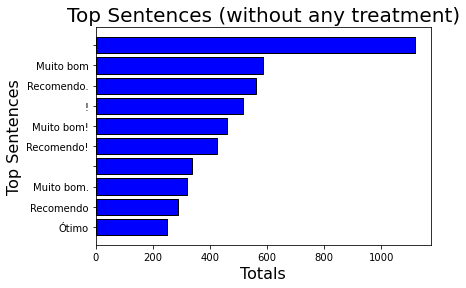

In [22]:
topSentencesLimit = 10
topSentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = df['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (without any treatment)', fontsize=20 )
plt.show()

In [23]:
def cleanSentence( sentence ):
    
    return str(sentence).lower().strip( ' .!\'️\'' )

In [24]:
# sentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1]
# cleanedSentences = [cleanSentence( sentence ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
# print( cleanedSentences )
# # print( len(cleanedSentences[3]) )
# # print( cleanedSentences[3] )
# # print( cleanedSentences[3].isspace() )
# # print( not cleanedSentences[3] )

In [25]:
sentences = df['sentence'].tolist()
# [print(sentence) for sentence in sentences]
cleanedSentences = [cleanSentence( sentence ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
dfTopSentences = df
dfTopSentences['sentence'] = cleanedSentences
dfTopSentences['sentence'].head()

0    sabe todos aqueles livros que ensinam você a c...
1    ou daqueles que você termina a leitura sentind...
2    você não vai encontrar um setup milagroso, ou ...
3    basicamente este livro conta verdades sobre o ...
4    mostra os detalhes de uma forma tão direta e b...
Name: sentence, dtype: object

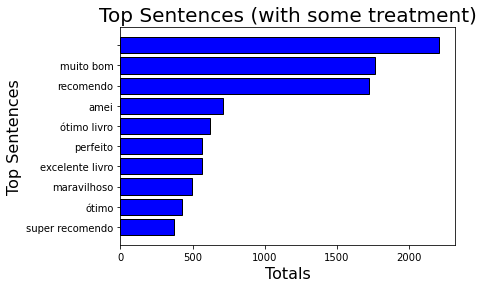

In [26]:
topSentencesLimit = 10
topSentences = dfTopSentences['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = dfTopSentences['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (with some treatment)', fontsize=20 )
plt.show()

### Repeated Sentences

In [27]:
total = len(dfTopSentences['sentence'])
values = dfTopSentences['sentence'].value_counts()[:total]
sentences = dfTopSentences['sentence'].value_counts()[:total].index

In [28]:
repeatedSentences = list()
for i in range(0, len(sentences)):
    # print( f'{sentence[i]} - {values[i]}' )
    if values[i] > 1:
        repeatedSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(repeatedSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[:showTotal]:
        
    print( f"{item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[-showTotal:]:
        
    print( f"{item['sentence']} - {item['value']}" )

Total of results: 11241
--------------------------

First 10 results
--------------------------

 - 2211
muito bom - 1762
recomendo - 1724
amei - 710
ótimo livro - 618
perfeito - 567
excelente livro - 567
maravilhoso - 495
ótimo - 425
super recomendo - 374


Last 10 results
--------------------------

tal amor dá para ser sentido em cada palavra, cada detalhe - 2
fiz o pedido na sexta feira e chegou na segunda, muito rápido, bem embalado e tudo certinho - 2
encantador o livro, e com um toque de lição de vida também - 2
gostei bastante, já vou ler o terceiro - 2
um livro maravilhoso,que superou minhas expectativas eu não conseguia parar de ler ele - 2
recomendo todos os outros livros, este é o segundo - 2
história muito boa e envolvente - 2
livro chegou em perfeito estado.é - 2
adoro essa autora e principalmente essa coleção - 2
como minha mãe já havia me dado os outros faltou só este, aí comprei na amazon, ele só é maior que os outros mas ainda assim é lindo - 2


### Unique Sentences

In [29]:
uniqueSentences = list()
for i in range(0, len(sentences)):
    
    if values[i] == 1:
        uniqueSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(uniqueSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[:showTotal]:
        
    print( f"{item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[-showTotal:]:
        
    print( f"{item['sentence']} - {item['value']}" )

Total of results: 121954
--------------------------

First 10 results
--------------------------

ótima história, um livro para quem gosta de aventuras, recomendo, muito bom, fantástico, - 1
obrigado j.k por nos ter agraciado com tamanha obra - 1
que edição linda,cada detalhe lindo que não tenho palavras ara descrever - 1
ai ele é maravilhoso, era o que eu mais queria, tô amando - 1
o livro mais lindo que já vi - 1
maravilhosamente lindo - 1
o livro é fantástico, mesmo para quem já tenha assistido os filmes, o prazer da leitura chega a ser tão grande quanto ver o filme - 1
primeiro livro que li na infância, foi com ele que criei o habito pela leitura - 1
minhas filhas e eu amamos - 1
capa dura muito bem feia, veio perfeito e rapido - 1


Last 10 results
--------------------------

com gravuras, poster e capa artística - 1
uma das versões mais lindas que já vi de uma obra - 1
a melhor edição do hobbit já feita em todos os sentidos - 1
produto de qualidade e história incrível - 1
produto

### A good question to future investigation:

**We can relate these top sentences with users? Maybe the top sentences belongs to the same group of people...**

**But we need to observe privacy before this...**

## Building a Bag of Words (BoW) with the words of the sentences.

#### Get only unique sentences to analyse

In [30]:
tempDf = df

In [31]:
tempDf['sentence'] = [cleanSentence(sentence) for sentence in tempDf['sentence']]

In [32]:
len(tempDf)

176751

In [33]:
uniqueSentencesList = [ item['sentence'] for item in uniqueSentences ]
# uniqueSentencesList

In [34]:
tempDf = tempDf[ tempDf[ 'sentence' ].isin(uniqueSentencesList) ]

In [35]:
len(tempDf)

121954

In [36]:
tempDf

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...
...,...,...,...,...
176746,8544106595,RQUIEDP9RU8GN,5,"uma obra que toca nos seus maiores pesadelos,m..."
176747,8544106595,R28THF88K7GE5S,5,"leve,pesado,forte,suave,lindo,feio e todas as ..."
176748,8544106595,R28THF88K7GE5S,5,"lindo,lindo,lindo"
176749,8544106595,R28THF88K7GE5S,5,"amei,comi,bebi cada palavra"


#### Total of selected in partialDf

In [37]:
linesTotal = 1000

In [38]:
partialDf = tempDf.iloc[ :linesTotal ]

In [39]:
partialDf.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...


In [40]:
partialDf.tail()

,book_id,review_id,review_rating,sentence
1069,8595081530,RYNKB4IEF9PA,5,"execelente produto, bom acabamento, textura do..."
1070,8595081530,RYNKB4IEF9PA,5,"muito bom, vale apena está comprando não só pe..."
1071,8595081530,R1XOQNP1WHVMKL,5,um livro que traz ensinamentos por meio de par...
1072,8595081530,R1RUC5QM1NHJN0,5,"o livro é cheio de metáforas, o que denota mui..."
1073,8595081530,R1RUC5QM1NHJN0,5,"mas calma, a linguagem utilizada é de entendim..."


In [41]:
partialDf.shape

(1000, 4)

#### Disable warnings

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
# for i in range(0, len(partialDf)):
    
#     item = partialDf.iloc[i]
    
#     # print(item)
    
#     doc = nlp( item['sentence'] )
#     tokens = [ token.lemma_ for token in doc ]
    
#     for token in tokens:
        
#         if token not in partialDf.columns:
#             partialDf[ token ] = 0

#         partialDf.iloc[ i ][ token ] = 1
#         # print(partialDf.iloc[ i ][ token ])

# partialDf.head()

In [44]:
def tokenizer( sentence ):
    
    # sentence = sentence.strip("!%'(),-.—“”●♥")
    sentence = sentence.replace("!", "")
    sentence = sentence.replace("%", "")
    sentence = sentence.replace("'", "")
    sentence = sentence.replace("(", "")
    sentence = sentence.replace(")", "")
    sentence = sentence.replace(",", "")
    sentence = sentence.replace("-", "")
    sentence = sentence.replace("—", "")
    sentence = sentence.replace("“", "")
    sentence = sentence.replace("”", "")
    sentence = sentence.replace("●", "")
    sentence = sentence.replace("♥", "")    
    sentence = sentence.replace(".", "")
    sentence = sentence.replace("4", "")
    sentence = sentence.replace("/", "")
    sentence = sentence.replace("03", "")
    sentence = sentence.replace("1", "")
    sentence = sentence.replace("10", "")
    sentence = sentence.replace("115", "")
    sentence = sentence.replace("12", "")
    
    doc = nlp( sentence )
    tokens = [token.lemma_ for token in doc]
    
    return tokens

### BoW - Sparse Matrix - Token Frequency

In [45]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1))
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowTokenFrequency = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTokenFrequency.head(20)

,,,0,2,20,202,2022,207,28,28arkad,...,óbvioo,ótico,ótima,ótimas,ótimo,ótimos,último,único,útil,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW - Sparse Matrix - Binary

In [46]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1),
    binary=True)
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowBinary = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowBinary.head(20)

,,,0,2,20,202,2022,207,28,28arkad,...,óbvioo,ótico,ótima,ótimas,ótimo,ótimos,último,único,útil,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW - Sparse Matrix - TF-IDF

#### https://www.kaggle.com/code/k4puneet/countvectorizer-tfidf-tutorial/notebook

In [47]:
vectorizer = TfidfVectorizer( analyzer = tokenizer )

dfBowTFIDF = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTFIDF.head(20)

,,,0,2,20,202,2022,207,28,28arkad,...,óbvioo,ótico,ótima,ótimas,ótimo,ótimos,último,único,útil,…
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Total of clusters

In [48]:
clustersTotal = 5

### Function: classReport

In [49]:
def classReport( columnLabel, clustersTotal ):

    for i in range(0, clustersTotal):

        print( '===========================================================================' )
        print( f'Representation: {columnLabel} - class: {i}' )
        print( '===========================================================================' )
        print()

        dfClass = partialDf[ partialDf[ columnLabel ] == i ]

        display( dfClass.head(10) )
        print()

        print( f'Sentences by score from class {i}' )
        print( '====================================' )
        print( dfClass[ 'review_rating' ].value_counts().sort_index( ascending=False ) )
        print()

        print( f'Examples from class {i}' )
        print( '====================================' )
        print()

        sentencesClass = dfClass['sentence'].sample(5)
        for sentence in sentencesClass:
            print( sentence )
            print()
            print( '-----------------------------------' )
            print()

        print( '###########################################################################' )
        print( '###########################################################################' )
        print( '###########################################################################' )
        print()

### K-Means - BoW - Sparse Matrix - Token Frequency

In [50]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTokenFrequency )
kmeans

KMeans(n_clusters=5, random_state=0)

In [51]:
kmeans.labels_

array([2, 3, 4, 3, 2, 4, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0,
       0, 3, 3, 3, 3, 4, 3, 3, 3, 0, 2, 3, 3, 0, 4, 0, 2, 3, 3, 3, 2, 2,
       2, 4, 0, 3, 3, 0, 3, 3, 3, 3, 4, 0, 4, 3, 0, 3, 3, 4, 4, 3, 4, 0,
       0, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0, 0, 3, 2, 3, 0, 3, 0, 3, 3, 0, 0,
       2, 2, 3, 2, 1, 3, 0, 3, 3, 4, 0, 0, 3, 3, 3, 3, 4, 3, 3, 3, 0, 2,
       2, 2, 2, 2, 3, 4, 0, 0, 4, 3, 3, 0, 3, 4, 3, 4, 3, 3, 2, 2, 4, 2,
       3, 2, 4, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 2, 3, 3, 4, 4, 4, 3, 0, 4,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 2, 2, 0, 3, 2, 4, 4, 0, 3, 1, 0,
       3, 0, 3, 3, 4, 3, 0, 2, 2, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 0, 2, 2, 2, 0, 0, 0, 4, 0, 3, 2, 3, 3, 0, 0, 3, 4, 4,
       3, 3, 2, 3, 3, 3, 0, 3, 0, 0, 3, 4, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 3, 4, 3, 3, 0, 0, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 3,
       3, 0, 3, 4, 3, 2, 0, 4, 0, 0, 3, 2, 3, 2, 4, 0, 4, 3, 2, 3, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 0,

In [52]:
kmeans.cluster_centers_

array([[ 4.54545455e-02, -6.50521303e-19,  4.54545455e-03, ...,
         4.54545455e-03,  9.09090909e-03, -1.30104261e-18],
       [ 5.00000000e-01,  0.00000000e+00, -1.73472348e-18, ...,
         1.00000000e-01,  0.00000000e+00, -4.33680869e-19],
       [ 6.86274510e-02, -6.50521303e-19,  2.94117647e-02, ...,
         3.92156863e-02, -1.30104261e-18, -8.67361738e-19],
       [ 3.42052314e-02,  2.01207243e-03,  1.40845070e-02, ...,
        -5.20417043e-18, -1.30104261e-18,  6.03621730e-03],
       [ 3.50877193e-02, -6.50521303e-19,  1.75438596e-02, ...,
        -3.46944695e-18, -1.30104261e-18, -1.73472348e-18]])

In [53]:
columnLabel = 'class__bow_token_frequency'

In [54]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,2
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,3
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",4
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,3
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,2


In [55]:
partialDf[columnLabel].value_counts().sort_index()

0    220
1     10
2    102
3    497
4    171
Name: class__bow_token_frequency, dtype: int64

#### PCA

In [56]:
pcaBowTokenFrequency = PCA( n_components=2 )
principalComponentsBowTokenFrequency = pcaBowTokenFrequency.fit_transform( dfBowTokenFrequency )
# principalComponentsBowTokenFrequency
# type(principalComponentsBowTokenFrequency)

In [57]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowTokenFrequency:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

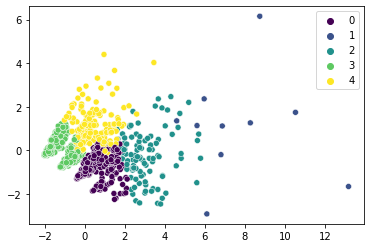

In [58]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [59]:
%%time
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowTokenFrequency )
mds.shape

CPU times: total: 1min 13s
Wall time: 47.4 s


(1000, 2)

In [60]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

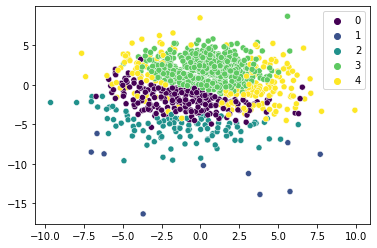

In [61]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### TSNE

In [62]:
%%time
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowTokenFrequency )
tsne.shape

CPU times: total: 27 s
Wall time: 10.5 s


(1000, 2)

In [63]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

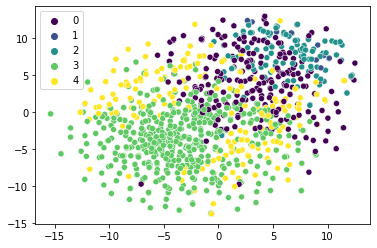

In [64]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [65]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_token_frequency - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,0
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,0
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,0
24,8595081530,R3KC0ZLPQX85LT,5,"é importante investir o seu dinheiro, não deix...",0
33,8595081530,R3KC0ZLPQX85LT,5,"para se alcançar a riqueza, é necessário corre...",0
37,8595081530,R3KC0ZLPQX85LT,5,é necessário saber aonde investir os seus frut...,0
39,8595081530,R3KC0ZLPQX85LT,5,devemos seguir a opinião daqueles que lidam ha...,0
49,8595081530,RGJ6BAA0J8P77,5,leitura fácil mas com conteúdo profundo para r...,0
53,8595081530,R2CMLSZODT5PMM,4,o livro traz lições importantes como:-busque c...,0
59,8595081530,R3O9BCBUG7LI29,5,o livro é da década de 1920 e não tem a pegada...,0



Sentences by score from class 0
5    178
4     22
3     10
2      5
1      5
Name: review_rating, dtype: int64

Examples from class 0

o livro repassa ensinamentos sobre riqueza, no qual, ele deixa claro que existem regras para o sucesso financeiro sempre precedido de uma boa preparação

-----------------------------------

ele torna possível o gozo das melhores coisas que a terra pode oferecer

-----------------------------------

livro prático e seguindo os passos você realmente começa a ter domínio sobre o ouro, dinheiro

-----------------------------------

o livro é da década de 1920 e não tem a pegada destes livros atuais da mesma categoria

-----------------------------------

gente, o livro é muito bom mesmo pra quem está virando a chave em relação à educação financeira

-----------------------------------

###########################################################################
###########################################################################
####################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
75,8595081530,R17E1E7TALNLBD,5,as idéias principais do livro são:1.de cada de...,1
96,8595081530,R17E1E7TALNLBD,5,e não se deixe enganar sob o romantismo de enr...,1
181,8595081530,R2RSPLKPAOZNY9,4,para quem é estudioso da área de economia o li...,1
355,8595081530,RQETXCD4BD91V,5,o livro trata de como vc deve passar a pensar ...,1
487,8595081530,R2VULRVN2LCNI4,5,um rio de riqueza fluindo constantemente para ...,1
509,8595081530,R1RH66NCIT3IS6,5,"o homem mais rico da babilônia é um livro 2x1,...",1
630,8595081530,R24F8OB2QNDE4F,5,aprendi a entender de forma simples e objetiva...,1
679,8595081530,R3V6KA1GCYYJK8,5,o livro aborda uma série de histórias muito be...,1
788,8595081530,R3UWHEYY6TBDV1,5,o livro o homem mais rico da babilônia é um li...,1
804,8595081530,R1KMMBQUTURHNX,5,sobre o livro - ele é um dos meus preferidos a...,1



Sentences by score from class 1
5    9
4    1
Name: review_rating, dtype: int64

Examples from class 1

e não se deixe enganar sob o romantismo de enriquecer rapidamente.- façam do lar um investimento lucrativoisso vai contra o que se lê em muitos livros de inteligência financeira em que a residência própria costuma ser um passivo em que só leva a gastos.- assegurem uma renda para o futuroa existência de um homem vai da infância `a velhice, portanto por ser este o caminho da vida, exceto se os deus o chamarem antes, todo homem deve providenciar uma renda condizente com os dias futuros, quando não for mais jovem e providenciar que a família não fique na penúria, quando já não puder contar com ele para conforto e sustento.- aumente sua capacidade para ganharparticularmente,

-----------------------------------

para quem é estudioso da área de economia o livro é nada mais do que uma ilustração das leis básicas que regem o mercado, é muito claro que qualquer pessoa em sã consciência sabe

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,2
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,2
34,8595081530,R3KC0ZLPQX85LT,5,pessoas procrastinadoras deixam tudo para a úl...,2
40,8595081530,R3KC0ZLPQX85LT,5,"temos que ter segurança, pois é isso que busca...",2
45,8595081530,R3KC0ZLPQX85LT,5,devemos sempre nos aperfeiçoar e aprender com ...,2
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",2
47,8595081530,R2UADYH9X17S5V,4,embora tenha alguns conceitos hoje contestados...,2
83,8595081530,R17E1E7TALNLBD,5,arkad ainda acrescenta que se deve guardar no ...,2
92,8595081530,R17E1E7TALNLBD,5,o objetivo é ajudar a juntar dinheiro de manei...,2



Sentences by score from class 2
5    80
4    17
3     3
2     1
1     1
Name: review_rating, dtype: int64

Examples from class 2

mais,2- pague a si mesmo primeiro,3- adquira, poupe e use o dinheiro,4- o dinheiro tem que trabalhar para você (invista),5- assegure uma renda para o futuro,6- boa sorte é saber aproveitar as oportunidades,7- trabalhe firme, dando seu melhor,8- não procrastine

-----------------------------------

e, ainda, compara a experiência dos mais velhos às “estrelas fixas que, sem mudar de lugar, auxiliam o marinheiro a orientar o seu curso”

-----------------------------------

o livro é composto por várias parábolas babilônicas, e a mais importante é a que dá nome ao livro, a história de arkad, um homem que construiu seu patrimônio com muita sabedoria

-----------------------------------

o fato é que se você tiver uma mentalidade de poupar pelo menos 10% de tudo o que você ganha, o pelo menos 1% que seja, já contribui imensamente para essa mudança de mentalidade 

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,3
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,3
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,3
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,3
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,3
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",3
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",3
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,3
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",3
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",3



Sentences by score from class 3
5    401
4     56
3     14
2     13
1     13
Name: review_rating, dtype: int64

Examples from class 3

excelente obra para entusiastas e profissionais

-----------------------------------

gastar com necessidades, e não com desejos

-----------------------------------

“o homem mais rico da babilônia”

-----------------------------------

para mim, 3 estrelas é muito

-----------------------------------

recomendo bastante você lê

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_token_frequency - class: 4



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",4
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,4
29,8595081530,R3KC0ZLPQX85LT,5,devemos guardar uma parte do que ganhamos para...,4
38,8595081530,R3KC0ZLPQX85LT,5,"em uma passagem do livro, se fala que não deve...",4
48,8595081530,RGJ6BAA0J8P77,5,de forma clara traz ensinamentos sobre educaçã...,4
58,8595081530,R3O9BCBUG7LI29,5,"no inicio, achei que era só mais um livro de a...",4
60,8595081530,R3O9BCBUG7LI29,5,é uma ficção em forma de fábulas com objetivo ...,4
65,8595081530,R102K5ZA97V7VT,3,"bom livro, nada excepcional, é um livro de min...",4
66,8595081530,R102K5ZA97V7VT,3,é um bom livro pra quem ta pensando em começar...,4
68,8595081530,R17E1E7TALNLBD,5,o significado do sucesso e liberdade financeir...,4



Sentences by score from class 4
5    133
4     24
3      9
2      1
1      4
Name: review_rating, dtype: int64

Examples from class 4

não é um livro técnico, os ensinamentos vem por meio de histórias

-----------------------------------

leitura obrigatória para obter conhecimento de educação financeira e mudança de hábitos com relação ao dinheiro

-----------------------------------

dá para ler em três dias, é aquele livro que você lê depois de terminar um asimov que destrói seu cérebro de tantos nomes esquisitos

-----------------------------------

em linguagem extremamente simples e recheado de parábolas, este livro é um pequeno compêndio das principais lições de economia familiar

-----------------------------------

excelente para quem está começando a investir pois aborda conceitos de como separar uma parte da renda mensal para realização de investimentos, alguns critérios de avaliação de investimentos e como conseguir crescer com persistência e paciência

-------------------

### K-Means - BoW - Sparse Matrix - Binary

In [66]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowBinary )
kmeans

KMeans(n_clusters=5, random_state=0)

In [67]:
kmeans.labels_

array([3, 1, 2, 4, 2, 3, 4, 1, 4, 2, 3, 1, 4, 1, 4, 1, 4, 3, 1, 3, 4, 3,
       3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 2, 4, 3, 1, 1, 3, 4, 4, 4, 2, 0,
       1, 2, 3, 1, 4, 2, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 0, 2, 0, 1, 2, 3,
       4, 4, 1, 3, 1, 3, 4, 4, 4, 3, 3, 4, 1, 2, 2, 1, 1, 4, 4, 2, 3, 2,
       2, 2, 4, 2, 3, 4, 1, 4, 4, 2, 1, 0, 4, 4, 4, 4, 0, 1, 1, 2, 4, 3,
       3, 2, 1, 2, 1, 3, 1, 3, 3, 4, 3, 2, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3,
       3, 3, 2, 4, 4, 2, 1, 4, 2, 4, 4, 4, 2, 2, 1, 4, 2, 2, 2, 3, 2, 0,
       4, 4, 1, 2, 4, 4, 4, 2, 4, 4, 3, 3, 3, 2, 1, 0, 3, 3, 4, 4, 0, 1,
       4, 3, 1, 4, 2, 4, 3, 0, 2, 0, 2, 4, 2, 2, 1, 1, 4, 1, 3, 4, 2, 4,
       4, 4, 4, 0, 1, 1, 2, 3, 2, 1, 1, 3, 4, 4, 3, 4, 4, 2, 2, 4, 2, 2,
       1, 4, 3, 1, 4, 2, 1, 3, 3, 4, 4, 3, 4, 2, 2, 4, 4, 1, 2, 3, 4, 2,
       2, 2, 1, 3, 2, 3, 4, 4, 1, 2, 3, 4, 3, 4, 2, 2, 3, 4, 3, 3, 4, 4,
       4, 3, 4, 0, 4, 2, 3, 2, 2, 3, 4, 2, 4, 3, 2, 2, 2, 4, 3, 4, 4, 2,
       4, 4, 1, 1, 4, 4, 4, 4, 1, 2, 1, 1, 3, 2, 4,

In [68]:
kmeans.cluster_centers_

array([[ 1.14942529e-01, -4.33680869e-19, -3.46944695e-18, ...,
        -8.67361738e-19, -8.67361738e-19, -4.33680869e-19],
       [ 2.31213873e-02, -6.50521303e-19,  1.73410405e-02, ...,
        -2.60208521e-18, -1.30104261e-18, -1.30104261e-18],
       [ 2.33644860e-02, -6.50521303e-19,  2.80373832e-02, ...,
         9.34579439e-03,  9.34579439e-03,  4.67289720e-03],
       [ 5.00000000e-02, -6.50521303e-19,  1.66666667e-02, ...,
         2.22222222e-02, -1.30104261e-18, -1.30104261e-18],
       [ 3.75722543e-02,  2.89017341e-03,  5.78034682e-03, ...,
        -3.46944695e-18, -1.30104261e-18,  5.78034682e-03]])

In [69]:
columnLabel = 'class__bow_binary'

In [70]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,2,3
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,3,1
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",4,2
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,3,4
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,2,2


In [71]:
partialDf[columnLabel].value_counts().sort_index()

0     87
1    173
2    214
3    180
4    346
Name: class__bow_binary, dtype: int64

#### PCA

In [72]:
pcaBowBinary = PCA( n_components=2 )
principalComponentsBowBinary = pcaBowBinary.fit_transform( dfBowBinary )
# principalComponentsBowBinary
# type(principalComponentsBowBinary)

In [73]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowBinary:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

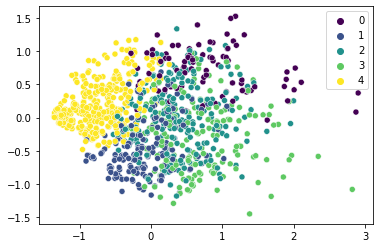

In [74]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [75]:
%%time
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowBinary )
mds.shape

CPU times: total: 1min 10s
Wall time: 40.7 s


(1000, 2)

In [76]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

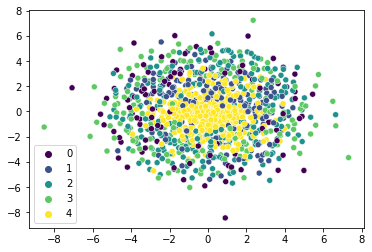

In [77]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### TSNE

In [78]:
%%time
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowBinary )
tsne.shape

CPU times: total: 26.4 s
Wall time: 9.73 s


(1000, 2)

In [79]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

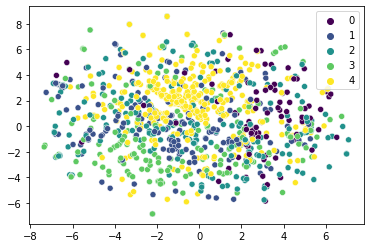

In [80]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [81]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_binary - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",2,0
64,8595081530,R3O9BCBUG7LI29,5,o livro chegou sem nenhum problema e foi entre...,3,0
66,8595081530,R102K5ZA97V7VT,3,é um bom livro pra quem ta pensando em começar...,4,0
103,8595081530,R17E1E7TALNLBD,5,no capítulo 4 ele relata sobre a “deusa da boa...,0,0
108,8595081530,R17E1E7TALNLBD,5,"logo, o oposto, procrastinar é um hábito contr...",4,0
160,8595081530,RTZKT8JX3Z4VU,4,um livro com ensinamentos tão profundos e uma ...,4,0
176,8595081530,R1JTIDA62Y7XM8,3,uma leitura simples e básica sobre histórias c...,2,0
181,8595081530,R2RSPLKPAOZNY9,4,para quem é estudioso da área de economia o li...,1,0
190,8595081530,R1LS1B60UNK6HX,5,o livro trata de como os babilônicos lidavam c...,2,0
192,8595081530,R3Q1UDXF8DX0XU,5,"por tratar dos comportamentos, crenças e narra...",0,0



Sentences by score from class 0
5    67
4    13
3     6
1     1
Name: review_rating, dtype: int64

Examples from class 0

o livro trata de como os babilônicos lidavam com o dinheiro (e, diga-se de passagem, eles sabiam muito sobre o assunto)

-----------------------------------

o livro aborda uma série de histórias muito bem desenvolvidas na época da grande babilônia, contos sobre finanças e como se portar com seu dinheiro, dicas e métodos financeiros da época antiga que se aplicam muito facilmente nos dias atuais, as tabuinhas de argila e as cinco leis do ouros são muito ricas em conhecimento e esse livro é um tapa na cara para quem quer saber gerir melhor seus investimentos e conquistar sua liberdade financeira

-----------------------------------

gente, o livro é muito bom mesmo pra quem está virando a chave em relação à educação financeira

-----------------------------------

o livro é muito bacana e abre os olhos para quem, como eu, tem problemas com o uso indiscriminado do di

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,3,1
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,3,1
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",3,1
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",3,1
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,3,1
20,8595081530,R3KC0ZLPQX85LT,5,"por isso, precisamos saber exatamente no que g...",3,1
38,8595081530,R3KC0ZLPQX85LT,5,"em uma passagem do livro, se fala que não deve...",4,1
39,8595081530,R3KC0ZLPQX85LT,5,devemos seguir a opinião daqueles que lidam ha...,0,1
47,8595081530,R2UADYH9X17S5V,4,embora tenha alguns conceitos hoje contestados...,2,1
51,8595081530,RZ65FZEPU1Y8V,1,o homem mais rico da babilônia está faltando p...,3,1



Sentences by score from class 1
5    143
4     16
3      7
2      3
1      4
Name: review_rating, dtype: int64

Examples from class 1

o ouro foge do homem que o emprega em negócios ou propósitos com os quais não está familiarizado ou que não contam com a aprovação daqueles que sabem poupá-lo.-

-----------------------------------

o homem mais rico da babilônia está faltando páginas, sendo que tem inclusive algumas páginas impressas faltando parte das palavras

-----------------------------------

existem livros, mas existem obras que fazem seus olhos brilharem

-----------------------------------

por isso, precisamos saber exatamente no que gastamos

-----------------------------------

mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter

-----------------------------------

###########################################################################
###########################################################################
###########################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",4,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,2,2
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,0,2
35,8595081530,R3KC0ZLPQX85LT,5,“os homens de ação são favorecidos pela deusa ...,3,2
45,8595081530,R3KC0ZLPQX85LT,5,devemos sempre nos aperfeiçoar e aprender com ...,2,2
48,8595081530,RGJ6BAA0J8P77,5,de forma clara traz ensinamentos sobre educaçã...,4,2
53,8595081530,R2CMLSZODT5PMM,4,o livro traz lições importantes como:-busque c...,0,2
59,8595081530,R3O9BCBUG7LI29,5,o livro é da década de 1920 e não tem a pegada...,0,2
65,8595081530,R102K5ZA97V7VT,3,"bom livro, nada excepcional, é um livro de min...",4,2
68,8595081530,R17E1E7TALNLBD,5,o significado do sucesso e liberdade financeir...,4,2



Sentences by score from class 2
5    181
4     25
3      4
2      2
1      2
Name: review_rating, dtype: int64

Examples from class 2

diversos outros ensinamentos são passados durante os textos, e outros personagens surgem, dentre eles dabasir, o negociante de camelos que têm uma das histórias mais reais do livro

-----------------------------------

com passagens simples, diretas e objetivas, traz reflexões lúcidas com textos de mais de 5 mil anos

-----------------------------------

e vou ler de novo assim que tiver oportunidade

-----------------------------------

quem de fato absorve o que se ensina aqui, aprende a se relacionar com o trabalho e com o dinheiro

-----------------------------------

em linguagem extremamente simples e recheado de parábolas, este livro é um pequeno compêndio das principais lições de economia familiar

-----------------------------------

###########################################################################
###################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,2,3
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,4,3
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",3,3
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,0,3
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,2,3
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,0,3
24,8595081530,R3KC0ZLPQX85LT,5,"é importante investir o seu dinheiro, não deix...",0,3
25,8595081530,R3KC0ZLPQX85LT,5,pegue suas economias para que elas possam lhe ...,3,3
28,8595081530,R3KC0ZLPQX85LT,5,é essencial que tenhamos um dinheiro guardado ...,3,3
29,8595081530,R3KC0ZLPQX85LT,5,devemos guardar uma parte do que ganhamos para...,4,3



Sentences by score from class 3
5    145
4     20
3      6
2      5
1      4
Name: review_rating, dtype: int64

Examples from class 3

o livro é bacana, aprendi algumas coisas, ele é rápido e fluido porém achei bastante repetitivo, do meio para o final ele somente repetia o que já havia dito com alguns exemplos

-----------------------------------

outro detalhe, humanos sob fortes emoções constituem grande perigo para o emprestador de dinheiro

-----------------------------------

aí surge a necessidade de buscarmos opções para termos um melhor controle das nossas finanças

-----------------------------------

pessoas procrastinadoras deixam tudo para a última hora, acham que ainda são novas para guardar dinheiro e querem aproveitar a vida, mas quando o tempo passa percebem que cometeram um erro, o erro de não se movimentar

-----------------------------------

mas é um livro para aprender os princípios, ou ainda para formar sua mentalidade de rico

----------------------------------

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,3,4
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,3,4
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,3,4
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,3,4
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",3,4
18,8595081530,R3KC0ZLPQX85LT,5,controle os seus gastos,3,4
22,8595081530,R3KC0ZLPQX85LT,5,multiplique o seu dinheiro,3,4
26,8595081530,R3KC0ZLPQX85LT,5,"não adianta só poupar, devemos investir.4",3,4
27,8595081530,R3KC0ZLPQX85LT,5,assegure uma renda para o futuro,3,4
30,8595081530,R3KC0ZLPQX85LT,5,não seja um procrastinador,3,4



Sentences by score from class 4
5    265
4     46
3     13
2     10
1     12
Name: review_rating, dtype: int64

Examples from class 4

gastar com necessidades, e não com desejos

-----------------------------------

tornem-no seu escravo

-----------------------------------

embora o enredo seja confuso, enfadonho e mal distribuído.4

-----------------------------------

sobre a obra: muito bom

-----------------------------------

para mim, 3 estrelas é muito

-----------------------------------

###########################################################################
###########################################################################
###########################################################################



### K-Means - BoW - Sparse Matrix - TF-IDF

In [82]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTFIDF )
kmeans

KMeans(n_clusters=5, random_state=0)

In [83]:
kmeans.labels_

array([3, 2, 0, 2, 3, 1, 4, 0, 2, 3, 3, 3, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 3, 1, 0, 0, 3, 2, 4, 0, 2, 0, 2, 3, 0, 0, 1, 2, 4,
       3, 2, 1, 4, 4, 0, 4, 1, 1, 3, 1, 4, 3, 0, 4, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 4, 2, 1, 0, 0, 2, 3, 2, 0, 3, 2, 3, 2, 2, 3, 3, 2, 3,
       2, 2, 0, 2, 2, 0, 2, 1, 4, 0, 2, 4, 0, 0, 0, 0, 1, 0, 1, 4, 0, 2,
       2, 2, 2, 2, 4, 3, 2, 2, 3, 0, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2,
       3, 2, 3, 0, 0, 2, 0, 0, 0, 1, 4, 4, 3, 2, 1, 0, 1, 4, 3, 4, 3, 1,
       0, 0, 0, 3, 2, 2, 1, 4, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 1,
       4, 3, 0, 0, 2, 0, 2, 2, 2, 1, 4, 1, 2, 3, 2, 2, 4, 4, 2, 2, 2, 0,
       0, 0, 0, 4, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 0, 0, 3, 4, 0, 2, 3,
       0, 0, 2, 0, 0, 4, 2, 2, 2, 3, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 3, 0, 3, 0, 0, 2, 3, 2, 0, 2, 0, 3, 4, 2, 0, 2, 2, 1, 0,
       0, 4, 0, 0, 0, 4, 4, 2, 2, 3, 0, 2, 1, 2, 2, 1, 2, 0, 3, 1, 0, 3,
       4, 1, 4, 4, 0, 0, 0, 0, 2, 2, 2, 0, 3, 2, 2,

In [84]:
kmeans.cluster_centers_

array([[ 9.46631757e-03,  2.42326035e-03,  4.49258004e-03, ...,
         6.50521303e-19,  0.00000000e+00,  3.52118294e-03],
       [ 1.66001957e-02, -1.08420217e-19,  1.76838059e-03, ...,
         6.50521303e-19, -6.50521303e-19, -1.73472348e-18],
       [ 2.61329572e-03, -4.33680869e-19,  4.37539295e-03, ...,
         2.97123107e-03,  1.91465946e-03, -1.95156391e-18],
       [ 1.38269168e-02,  3.25260652e-19,  1.02621979e-02, ...,
         1.92084284e-03,  3.25260652e-19, -4.33680869e-19],
       [ 9.96564175e-03,  2.16840434e-19,  1.73472348e-18, ...,
         2.16840434e-19,  2.16840434e-19,  3.59726123e-03]])

In [85]:
columnLabel = 'class__bow_tfidf'

In [86]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,2,3,3
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,3,1,2
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",4,2,0
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,3,4,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,2,2,3


In [87]:
partialDf[columnLabel].value_counts().sort_index()

0    212
1    245
2    342
3    108
4     93
Name: class__bow_tfidf, dtype: int64

#### PCA

In [88]:
pca = PCA( n_components=2 )
principalComponents = pca.fit_transform( dfBowTFIDF )

In [89]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponents:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

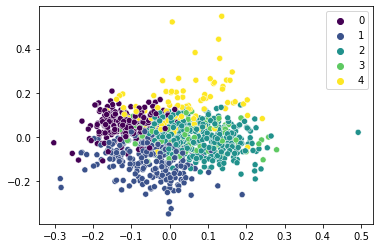

In [90]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [91]:
%%time
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowTFIDF )
mds.shape

CPU times: total: 1min 2s
Wall time: 35.9 s


(1000, 2)

In [92]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

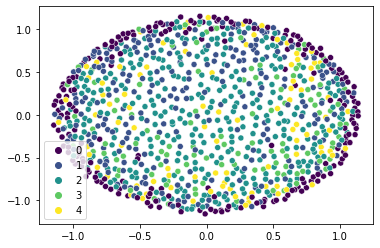

In [93]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### TSNE

In [94]:
%%time
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowTFIDF )
tsne.shape

CPU times: total: 22.5 s
Wall time: 8.28 s


(1000, 2)

In [95]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

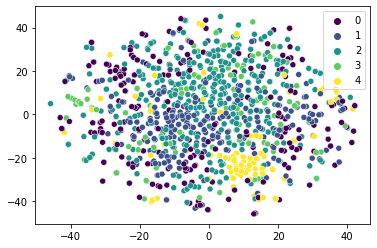

In [96]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [97]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_tfidf - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",4,2,0
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,3,1,0
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",3,1,0
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",3,4,0
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,3,1,0
20,8595081530,R3KC0ZLPQX85LT,5,"por isso, precisamos saber exatamente no que g...",3,1,0
26,8595081530,R3KC0ZLPQX85LT,5,"não adianta só poupar, devemos investir.4",3,4,0
31,8595081530,R3KC0ZLPQX85LT,5,devemos focar em nossos objetivos,3,4,0
32,8595081530,R3KC0ZLPQX85LT,5,"muitas pessoas querem ganhar dinheiro, porém, ...",3,4,0
36,8595081530,R3KC0ZLPQX85LT,5,“proteja seu tesouro contra a perda”,3,4,0



Sentences by score from class 0
5    166
4     20
3     10
2      7
1      9
Name: review_rating, dtype: int64

Examples from class 0

mas até agora estou amando

-----------------------------------

a riqueza engloba várias situações, que sejam internas ou externas

-----------------------------------

quem ainda não leu, leia

-----------------------------------

além de muitas páginas repetidas

-----------------------------------

quando ela se apresenta diante de você, pode enriquecê-lo e você não deve adiar

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 1



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,4,3,1
30,8595081530,R3KC0ZLPQX85LT,5,não seja um procrastinador,3,4,1
43,8595081530,R3KC0ZLPQX85LT,5,ninguém é dono de todo conhecimento,3,4,1
49,8595081530,RGJ6BAA0J8P77,5,leitura fácil mas com conteúdo profundo para r...,0,3,1
55,8595081530,R2CMLSZODT5PMM,4,vale a leitura do inicio ao fim,3,4,1
56,8595081530,R3O9BCBUG7LI29,5,livro proveitoso e de fácil leitura,3,4,1
58,8595081530,R3O9BCBUG7LI29,5,"no inicio, achei que era só mais um livro de a...",4,3,1
64,8595081530,R3O9BCBUG7LI29,5,o livro chegou sem nenhum problema e foi entre...,3,0,1
65,8595081530,R102K5ZA97V7VT,3,"bom livro, nada excepcional, é um livro de min...",4,2,1
66,8595081530,R102K5ZA97V7VT,3,é um bom livro pra quem ta pensando em começar...,4,0,1



Sentences by score from class 1
5    187
4     39
3     13
2      3
1      3
Name: review_rating, dtype: int64

Examples from class 1

são lições que não devem ser esquecidas

-----------------------------------

é uma leitura tranquila, facil de compreender, rica em conselhos financeiros

-----------------------------------

estou anotando tudo e marcando cada coisa importante e pretendo reler algumas vezes pois são conhecimentos um tanto que novos pra mim

-----------------------------------

é um livro que eu penso em indicar para meus filhos lerem qdo estiverem maiores

-----------------------------------

vale a leitura do inicio ao fim

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 2



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,3,1,2
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,3,4,2
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,3,4,2
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,3,4,2
18,8595081530,R3KC0ZLPQX85LT,5,controle os seus gastos,3,4,2
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,0,3,2
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,2,3,2
22,8595081530,R3KC0ZLPQX85LT,5,multiplique o seu dinheiro,3,4,2
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,0,3,2
24,8595081530,R3KC0ZLPQX85LT,5,"é importante investir o seu dinheiro, não deix...",0,3,2



Sentences by score from class 2
5    289
4     38
3      6
2      3
1      6
Name: review_rating, dtype: int64

Examples from class 2

ele torna possível o gozo das melhores coisas que a terra pode oferecer

-----------------------------------

e, finalmente, aprendeu a fazer o ouro trabalhar para você”

-----------------------------------

depois de ler esse livro é muito difícil o leitor continuar com a mesma visão de mundo, assim como de seu papel dele, do seu comportamento quanto as obrigações e prazes, dentre tantas outras coisas

-----------------------------------

mas para os demais o livro não traz nenhuma novidade ou dica valiosa, em suma, gaste menos do que ganha e será próspero financeiramente

-----------------------------------

tem muitos trechos que pretendo reler futuramente pois vão agregar muito valor na minha vida e na jornada que estou começando a criar

-----------------------------------

##########################################################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,2,3,3
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,2,2,3
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,0,2,3
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",3,3,3
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",3,1,3
27,8595081530,R3KC0ZLPQX85LT,5,assegure uma renda para o futuro,3,4,3
29,8595081530,R3KC0ZLPQX85LT,5,devemos guardar uma parte do que ganhamos para...,4,3,3
33,8595081530,R3KC0ZLPQX85LT,5,"para se alcançar a riqueza, é necessário corre...",0,3,3
40,8595081530,R3KC0ZLPQX85LT,5,"temos que ter segurança, pois é isso que busca...",2,3,3
47,8595081530,R2UADYH9X17S5V,4,embora tenha alguns conceitos hoje contestados...,2,1,3



Sentences by score from class 3
5    89
4    13
3     2
2     3
1     1
Name: review_rating, dtype: int64

Examples from class 3

uma bolsa gorda fica logo vazia se não houver um constante fluxo de ouro .nunca

-----------------------------------

é uma história de superação e de grande aprendizado para qualquer um

-----------------------------------

ensinamentos simples porém, de uma eficácia magnífica

-----------------------------------

este último fala que achou o caminho para a riqueza quando decidiu que conservaria com ele uma parte do que ganhasse

-----------------------------------

“uma parte de todos os seus ganhos pertencem exclusivamente a você

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 4



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,3,4,4
35,8595081530,R3KC0ZLPQX85LT,5,“os homens de ação são favorecidos pela deusa ...,3,2,4
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",2,0,4
51,8595081530,RZ65FZEPU1Y8V,1,o homem mais rico da babilônia está faltando p...,3,1,4
52,8595081530,RZ65FZEPU1Y8V,1,necessito da troca do produto,3,4,4
54,8595081530,R2CMLSZODT5PMM,4,o homem mais rico da babilônia possui muitas o...,3,1,4
59,8595081530,R3O9BCBUG7LI29,5,o livro é da década de 1920 e não tem a pegada...,0,2,4
62,8595081530,R3O9BCBUG7LI29,5,recomendo o livro com uma primeira leitura no ...,0,3,4
74,8595081530,R17E1E7TALNLBD,5,hoje é governando pelas mesmas coisas que o co...,0,1,4
100,8595081530,R17E1E7TALNLBD,5,quem deseja ser rico manifesta um propósito pr...,3,4,4



Sentences by score from class 4
5    70
4    10
3     5
2     4
1     4
Name: review_rating, dtype: int64

Examples from class 4

o livro é da década de 1920 e não tem a pegada destes livros atuais da mesma categoria

-----------------------------------

eu preferiria um final falando mais sobre o arkad (que é literalmente o homem mais rico da babilônia)

-----------------------------------

a riqueza que chega muito rápido vai embora da mesma maneira

-----------------------------------

mais um livro da série livros que você precisa estudar e colocar em prática

-----------------------------------

o autor consegue inserir princípios básicos sobre finanças em histórias incríveis dentro da babilônia

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

